In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

21.963050456933775


In [5]:
X.shape

(506, 13)

### SGD Implementation

**Square Loss**:
    1/n * summation(y_i - wTx_i - b)^2 ;  for i = 0,1,2.....n <br>
**Gradient w.r.t w**:
    -2/n * summation(y_i - wTx_i - b) * x_i ;  for i = 0,1,2.....n <br>
**Gradient w.r.t b**:
    -2/n * summation(y_i - wTx_i - b) ;  for i = 0,1,2.....n

In [6]:
## a function to calculate gradients and return respective gradients w.r.t w & b

def grad_calculate(alpha=None, weights=None, b=None, data_X=None, data_y=None ):
    size_n = data_X.shape[0]
    
    ## grad w.r.t w
    ## y_i_hat = w.T * data_X.T+b (multiplying all X instead of x_i, hence transpose of X)
    y_hat = np.matmul(weights.T, data_X.T).T + b
    
    ## (y_i - y_i_hat) * data_X.T (as summation of (y_i - y_i_hat)*x_i can be written as (y_i - y_i_hat)*data_X)
    grad_w = (-2/size_n) * (np.matmul((data_y.reshape(-1,1)-y_hat).T, data_X)).T
    
    
    
    ## grad w.r.t b --> -2/n * summation(y_i - wTx_i - b)
    grad_b = (-2/size_n) * np.sum(data_y.reshape(-1,1) - y_hat)
    
    #print(grad_b)
    
    return grad_w, grad_b
    

In [7]:
## function to calculate LinearRegression for given weights and returns (wTx_i+b)
## and plot y_pred vs y_true

import matplotlib.pyplot as plt

def plot_predY_vs_actualY(title=None, y_actual=None, y_pred=None):
    plt.scatter(y_actual, y_pred)
    plt.xlabel("Prices: Y_actual")
    plt.ylabel("Predicted prices: Y_pred")
    plt.title(title)
    plt.show()

def cal_error_loss(y_actual=None, y_pred=None):
    dif_sqr = (y_actual - y_pred)**2
    error = 1/y_actual.shape[0] * (np.sum(dif_sqr))
    #print(error)
    return error    

def cal_LR(X_data=None, w=None, b=None):
    y_pred = np.matmul(w.T, X_data.T).T + b    
    return y_pred

In [8]:
## SGD Function -- returns weights and b

# alpha - Learning rate
def sgd_LinearRegression(X_data=None, y=None, alpha=None, batch_size=None, max_iter=None, tol=None):
    
    ## initialize weights -- randomly
    w = np.random.rand(X_data.shape[1],1)
    b = np.random.rand()    
    
    ## loops: iterations for calculating weights
    for iter in range(0, max_iter):
        
        ## select random batch_size indexes: https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array
        random_indx = np.random.randint(X_data.shape[0], size=batch_size)
        batch_data_X = X_data[random_indx]
        batch_data_y = y[random_indx]

        
        ## return gradient calculated w.r.t w & b
        temp_w, temp_b = grad_calculate(alpha=alpha, weights=w, b=b, data_X=batch_data_X, data_y=batch_data_y)
        
        old_w = w
        old_b = b
        
        w = w - alpha*temp_w
        b = b - alpha*temp_b

        
        ## For terminating the loop: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
        '''
            tol : float or None, optional (default=1e-3)
            The stopping criterion.
        '''
        temp_Y_pred = cal_LR(X_data=X_data, w=w, b=b)
        cur_error = cal_error_loss(y_actual=y, y_pred=temp_Y_pred)
        
        ## will use --> if error is less than a tolerance value or if old weights and new weights are very close, i.e., difference between them be less than 0.0001
        if tol is not None:
            if (cur_error <= tol) or ((old_w - w)<0.00001).all():
                print("Iteration No.: ", iter)
                break
        elif tol is None:
            if ((old_w - w)<0.00001).all():
                print("Iteration No.: ", iter)
                break

        ## use 0.001 as epsilon to avolid alpha become 0 and get invalid nan or inf (it became 0 after some iterations)
        alpha = (alpha+0.001)/2
    
    return w, b
        

**Data**

In [9]:
data = pd.DataFrame(X, columns=load_boston().feature_names)
y = pd.DataFrame(Y, columns=['PRICE'])

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [11]:
y.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


**Split Train and Test Data**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [13]:
## Calling SGD for train data
## max_iteration = 10000 (tried with several max_iteration, cud see the loop break when max_iteration was very high)
## batch_size=150
weights, b = sgd_LinearRegression(X_data=X_train.values, y=Y_train.values, alpha=1, batch_size=100, max_iter=10000, tol=0.001)

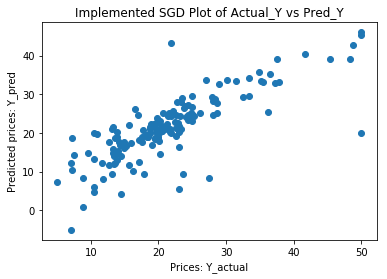

In [14]:
y_pred_train = cal_LR(X_data=X_train.values, w=weights, b=b)
y_pred_test = cal_LR(X_data=X_test.values, w=weights, b=b)

plot_predY_vs_actualY(title="Implemented SGD Plot of Actual_Y vs Pred_Y", y_actual=Y_test, y_pred=y_pred_test)

error_MSE_train = cal_error_loss(y_actual=Y_train.values, y_pred=y_pred_train)
error_MSE_test = cal_error_loss(y_actual=Y_test.values, y_pred=y_pred_test)

**Sklearn SGDRegressor**

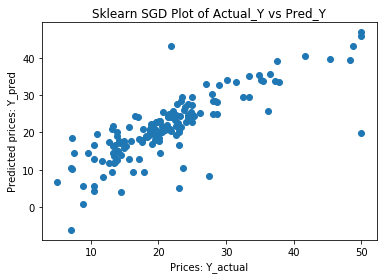

In [15]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, max_iter=1000)
lm.fit(X_train.values, Y_train.values)

y_pred_train = lm.predict(X_train.values)
y_pred_test = lm.predict(X_test.values)

plot_predY_vs_actualY("Sklearn SGD Plot of Actual_Y vs Pred_Y", Y_test, y_pred_test)

error_MSE_train_sk = mean_squared_error(Y_train, y_pred_train)
error_MSE_test_sk = mean_squared_error(Y_test, y_pred_test)

**Comparing weights, b, MSE of Self Implemented SGD vs Sklearn SGD**

In [16]:
from prettytable import PrettyTable

x = PrettyTable() ## For Weights
y = PrettyTable()
z = PrettyTable()

print("Pretty Table: Comaprison of Weights")

x.field_names = ["Sl. No.", "Weights - Implemented SGD", "Sklearn SGD - Weights", "Absolute Difference"]
for indx in range(0,weights.shape[0]):
    x.add_row([indx+1, weights[indx], lm.coef_[indx], abs(weights[indx] - lm.coef_[indx])])
    
y.field_names = ["Sl. No.", "Intercept - Implemented SGD", "Sklearn SGD - intercept", "Absolute Differenc"]
y.add_row([1, b, lm.intercept_, abs(b-lm.intercept_)])

z.field_names = ["Train/Test", "MSE - Implemented SGD", "Sklearn SGD - MSE", "Absolute Differenc"]
z.add_row(["Train", error_MSE_train, error_MSE_train_sk, abs(error_MSE_train - error_MSE_train_sk)])
z.add_row(["Test", error_MSE_test, error_MSE_test_sk, abs(error_MSE_test - error_MSE_test_sk)])

print(x)
print(y)
print(z)

Pretty Table: Comaprison of Weights
+---------+---------------------------+-----------------------+---------------------+
| Sl. No. | Weights - Implemented SGD | Sklearn SGD - Weights | Absolute Difference |
+---------+---------------------------+-----------------------+---------------------+
|    1    |       [-0.47060767]       |  -0.8361336228369617  |     [0.36552595]    |
|    2    |        [0.49092548]       |   0.7104597371893244  |     [0.21953426]    |
|    3    |       [-0.09095973]       |  0.07340272211002881  |     [0.16436245]    |
|    4    |        [1.07469634]       |   1.0595823167890333  |     [0.01511402]    |
|    5    |       [-1.57360974]       |  -1.6455778055064902  |     [0.07196807]    |
|    6    |        [4.02144714]       |   4.044627934853076   |     [0.02318079]    |
|    7    |        [0.11227695]       |  -0.07596247808984463 |     [0.18823942]    |
|    8    |       [-2.01816112]       |  -2.2883345434820543  |     [0.27017342]    |
|    9    |       